Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto is already the newest version (20201225-1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


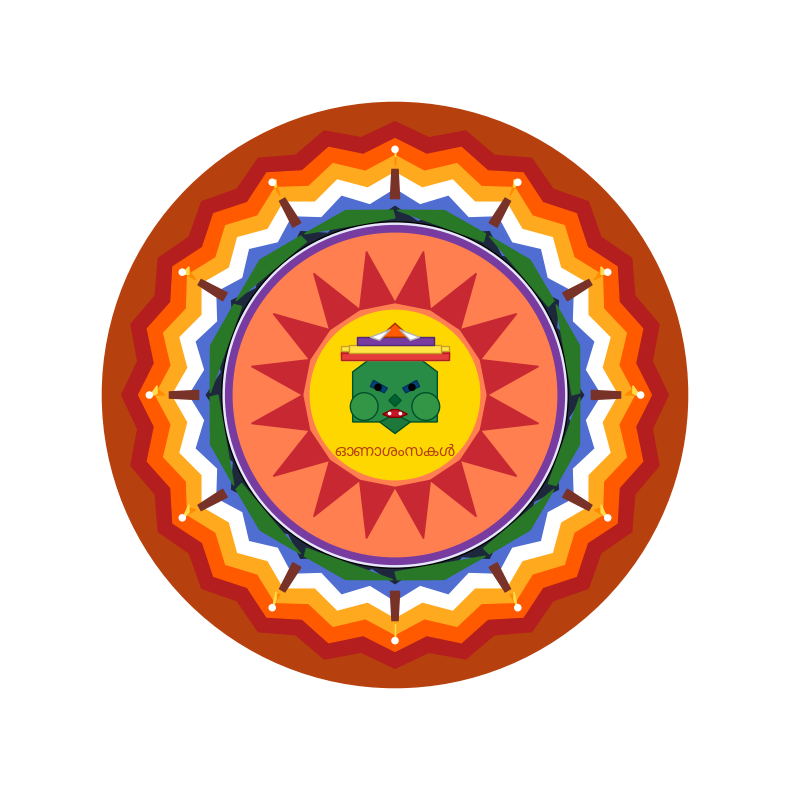

In [18]:
#Kathakali Pookkalam
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

#Setup
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
ax.set_aspect("equal")
ax.axis("off")

def circle_at(cx, cy, r, fill=None, outline=None, lw=1):
    circ = patches.Circle((cx, cy), r,
                          facecolor=fill, edgecolor=outline, linewidth=lw)
    ax.add_patch(circ)

def poly(points, fill=None, outline=None, lw=1):
    polygon = patches.Polygon(points, closed=True,
                              facecolor=fill, edgecolor=outline, linewidth=lw)
    ax.add_patch(polygon)

def ring_star_zig(radius_outer, radius_inner, spikes, palette):
    step = 360 / spikes
    for band, col in enumerate(palette):
        r1 = radius_outer - band * 22
        r2 = r1 - 18
        pts = []
        ang = 0
        for i in range(spikes):
            a1 = np.radians(ang)
            a2 = np.radians(ang + step/2)
            a3 = np.radians(ang + step)
            pts.append((r1*np.cos(a1), r1*np.sin(a1)))
            pts.append((r2*np.cos(a2), r2*np.sin(a2)))
            pts.append((r1*np.cos(a3), r1*np.sin(a3)))
            ang += step
        poly(pts, fill=col, outline=col)
    circle_at(0, 0, radius_inner, fill="lavender", outline="black")

def petal_ring(r_base, petal_len, petals, color):
    step = 360 / petals
    for i in range(petals):
        a = np.radians(i * step)
        aL = np.radians(i * step + step/2)
        base = (r_base*np.cos(a), r_base*np.sin(a))
        tip = ((r_base+petal_len)*np.cos(aL), (r_base+petal_len)*np.sin(aL))
        a2 = np.radians((i+1)*step)
        base2 = (r_base*np.cos(a2), r_base*np.sin(a2))
        poly([base, tip, base2], fill=color, outline=color)

def leaf_ring(r, leaves, leaf_len, leaf_w, color):
    step = 360 / leaves
    for i in range(leaves):
        a = np.radians(i * step)
        c = (r*np.cos(a), r*np.sin(a))
        a2 = a + np.radians(step/2)
        tip = ((r+leaf_len)*np.cos(a2), (r+leaf_len)*np.sin(a2))
        left = ((r+leaf_w)*np.cos(a2+0.25), (r+leaf_w)*np.sin(a2+0.25))
        right = ((r+leaf_w)*np.cos(a2-0.25), (r+leaf_w)*np.sin(a2-0.25))
        poly([c, left, tip, right], fill=color, outline=color)

def torch_ring(r, count, shaft, flame, shaft_color=(120/255,50/255,40/255)):
    step = 360 / count
    for i in range(count):
        a = np.radians(i * step)
        base = (r*np.cos(a), r*np.sin(a))
        mid = ((r+shaft)*np.cos(a), (r+shaft)*np.sin(a))
        # shaft
        poly([
            (base[0]-6*np.sin(a), base[1]+6*np.cos(a)),
            (base[0]+6*np.sin(a), base[1]-6*np.cos(a)),
            (mid[0]+4*np.sin(a), mid[1]-4*np.cos(a)),
            (mid[0]-4*np.sin(a), mid[1]+4*np.cos(a))
        ], fill=shaft_color, outline=shaft_color)
        # flame
        flame_base = ((r+shaft+6)*np.cos(a), (r+shaft+6)*np.sin(a))
        flame_tip = ((r+shaft+flame)*np.cos(a), (r+shaft+flame)*np.sin(a))
        poly([flame_base,
              ((flame_base[0]+flame_tip[0])/2, (flame_base[1]+flame_tip[1])/2 + 8),
              flame_tip],
             fill=(1,0.55,0), outline=(1,0.55,0))
        poly([((flame_base[0]+flame_tip[0])/2, (flame_base[1]+flame_tip[1])/2 + 2),
              ((flame_base[0]+flame_tip[0])/2, (flame_base[1]+flame_tip[1])/2 + 12),
              (flame_tip[0], flame_tip[1]-2)],
             fill=(1,0.86,0.31), outline=(1,0.86,0.31))
        circle_at(flame_tip[0], flame_tip[1], 4, fill="white", outline="white")

#Base disc
circle_at(0, 0, 380, fill="#B7410E", outline="#B7410E")

#Outer Bands
palette = [
    (180/255, 30/255, 30/255),
    (1, 90/255, 0),
    (1, 170/255, 30/255),
    (1, 1, 1),
    (80/255, 110/255, 210/255),
    (30/255, 40/255, 60/255),
]
ring_star_zig(355, 225, 24, palette)

circle_at(0, 0, 220, fill=(120/255,60/255,160/255), outline=(120/255,60/255,160/255))
leaf_ring(230, 12, 18, 10, (40/255,120/255,40/255))
torch_ring(255, 12, 38, 26)
circle_at(0, 0, 210, fill="coral", outline="coral")
petal_ring(120, 70, 16, (200/255,40/255,50/255))
circle_at(0, 0, 110, fill="gold", outline="gold")

#Kathakali face
FACE_YSHIFT = -25
def adj(y): return y + FACE_YSHIFT
poly([(-55, adj(-10)), (55, adj(-10)), (55, adj(55)), (35, adj(70)), (-35, adj(70)), (-55, adj(55))],
     fill=(40/255,140/255,70/255), outline=(0,80/255,40/255))

#face Cheeks
circle_at(-40, adj(10), 18, fill=(50/255,150/255,70/255), outline=(0,80/255,40/255))
circle_at( 40, adj(10), 18, fill=(50/255,150/255,70/255), outline=(0,80/255,40/255))

#Chin
poly([(-20,adj(-10)),(0,adj(-25)),(20,adj(-10)),(0,adj(0))],
     fill=(30/255,120/255,60/255), outline=(0,80/255,40/255))

#Eyes
poly([(-32,adj(36)),(-14,adj(28)),(-10,adj(34)),(-28,adj(44))],
     fill=(0,70/255,120/255), outline=(0,50/255,90/255))
poly([(32,adj(36)),(14,adj(28)),(10,adj(34)),(28,adj(44))],
     fill=(0,70/255,120/255), outline=(0,50/255,90/255))
circle_at(-22, adj(35), 4, fill="black", outline="black")
circle_at( 22, adj(35), 4, fill="black", outline="black")

#Nose
poly([(-8,adj(18)),(0,adj(10)),(8,adj(18)),(0,adj(26))],
     fill=(0,100/255,50/255), outline=(0,80/255,40/255))

#Mouth
poly([(-16,adj(0)),(-6,adj(-4)),(6,adj(-4)),(16,adj(0)),(4,adj(6)),(-4,adj(6))],
     fill=(200/255,20/255,40/255), outline=(120/255,0,0))
circle_at(-7,adj(1),1.5, fill="white", outline="white")
circle_at( 7,adj(1),1.5, fill="white", outline="white")

#Forehead bands
poly([(-70,adj(70)),(70,adj(70)),(70,adj(76)),(-70,adj(76))],
     fill=(1,1,1), outline=(200/255,200/255,200/255))
poly([(-70,adj(76)),(70,adj(76)),(70,adj(82)),(-70,adj(82))],
     fill=(230/255,60/255,60/255), outline=(180/255,30/255,30/255))
poly([(-70,adj(82)),(70,adj(82)),(70,adj(88)),(-70,adj(88))],
     fill=(1,230/255,70/255), outline=(200/255,160/255,40/255))

#Crown
poly([(-70,adj(70)),(70,adj(70)),(70,adj(80)),(-70,adj(80))],
     fill=(230/255,60/255,60/255), outline=(180/255,30/255,30/255))
poly([(-60,adj(80)),(60,adj(80)),(60,adj(90)),(-60,adj(90))],
     fill=(1,230/255,70/255), outline=(200/255,160/255,40/255))
poly([(-50,adj(90)),(50,adj(90)),(50,adj(100)),(-50,adj(100))],
     fill=(120/255,60/255,160/255), outline=(80/255,40/255,120/255))

#Crest
poly([(-20,adj(100)),(0,adj(118)),(20,adj(100))],
     fill=(1,90/255,0), outline=(160/255,50/255,0))
poly([(-32,adj(100)),(-6,adj(110)),(-20,adj(96))],
     fill=(1,1,1), outline=(180/255,180/255,180/255))
poly([(32,adj(100)),(6,adj(110)),(20,adj(96))],
     fill=(1,1,1), outline=(180/255,180/255,180/255))

#Malayalam Onam Wishes Text
!apt-get install fonts-noto
import matplotlib.font_manager as fm
mal_font = fm.FontProperties(fname="/usr/share/fonts/truetype/noto/NotoSansMalayalam-Regular.ttf")

ax.text(0, -71, "ഓണാശംസകൾ", fontsize=11, fontweight="bold",
        ha="center", va="center", color=(183/255,65/255,14/255),
        fontproperties=mal_font)


plt.show()
